In [3]:
import cv2
from PIL import Image
import os
from tqdm.notebook import tqdm
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist

Dataset and Preprocessing:

In [4]:
image_dir = 'CIFAR-10-images/train/'
class_names = os.listdir(image_dir)

data_x = []
data_y = []

for i in tqdm(range(len(class_names))):
#     print(os.path.join(image_dir, class_names[i]))
    for img_file in tqdm(os.listdir(os.path.join(image_dir, class_names[i])), desc=class_names[i]):
#         print(os.path.join(image_dir, class_names[i]), img_file)
        img = cv2.imread(os.path.join(image_dir, class_names[i], img_file))
        img = cv2.resize(img, (32, 32))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img/255.0
        data_x.append(img)
        data_y.append(i)
data_x = np.array(data_x)
data_y = np.array(data_y)

  0%|          | 0/10 [00:00<?, ?it/s]

airplane:   0%|          | 0/5000 [00:00<?, ?it/s]

automobile:   0%|          | 0/5000 [00:00<?, ?it/s]

bird:   0%|          | 0/5000 [00:00<?, ?it/s]

cat:   0%|          | 0/5000 [00:00<?, ?it/s]

deer:   0%|          | 0/5000 [00:00<?, ?it/s]

dog:   0%|          | 0/5000 [00:00<?, ?it/s]

frog:   0%|          | 0/5000 [00:00<?, ?it/s]

horse:   0%|          | 0/5000 [00:00<?, ?it/s]

ship:   0%|          | 0/5000 [00:00<?, ?it/s]

truck:   0%|          | 0/5000 [00:00<?, ?it/s]

Model Building and Evaluation:

In [5]:
def get_result(distances, k=5):
    counter = {}
    for dist, label in distances[:k]:
        try:
            counter[label] = [counter[label][0] + 1, min(counter[label][1],dist)]
        except:
            counter[label] = [1, dist]
    
    results = []
    for key, val in counter.items():
        results.append([val[0], 10000 - val[1], key])
    results = sorted(results, reverse=True)
    return results[0][2]
        

    
k_values = [1, 3, 5, 7, 10, 15]
accuracy_dict = {}
for k in k_values:
    accuracy_dict[k] = 0
    
for i in range(5):
    train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2)
    train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1]*train_x.shape[2]))
    test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1]*test_x.shape[2]))
    
#     print(train_x.shape, test_x.shape)
    for k in tqdm(k_values, desc=f"fold{i+1}"):
        total, correct = 0, 0
        for index, test_img in tqdm(enumerate(test_x), total=test_x.shape[0]):
            test_img = np.expand_dims(test_img, 0)
    #         print(test_img.shape)
            distances = cdist(test_img, train_x, metric='cityblock')[0]
            results = []
            for i in range(len(distances)):
                results.append([distances[i], train_y[i]])
            results = sorted(results)
            pred = get_result(results, k=k)
            total += 1
            if test_y[index] == pred:
                correct += 1
    
        accuracy = (correct * 100)/total
        accuracy_dict[k] = accuracy_dict[k]+accuracy

fold1:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

fold2:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

fold3:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

fold4:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

fold5:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [6]:
for k in k_values:
    accuracy_dict[k] = round(accuracy_dict[k]/5.0, 2)
    print(f"K={k}, Accuracy: {accuracy_dict[k]}%")

K=1, Accuracy: 32.0%
K=3, Accuracy: 32.12%
K=5, Accuracy: 32.17%
K=7, Accuracy: 32.43%
K=10, Accuracy: 32.4%
K=15, Accuracy: 31.95%


In [7]:
accuracy_dict_eu = {}
for k in k_values:
    accuracy_dict_eu[k] = 0
    
for i in range(5):
    train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2)
    train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1]*train_x.shape[2]))
    test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1]*test_x.shape[2]))
    
#     print(train_x.shape, test_x.shape)
    for k in tqdm(k_values, desc=f"fold{i+1}"):
        total, correct = 0, 0
        for index, test_img in tqdm(enumerate(test_x), total=test_x.shape[0]):
            test_img = np.expand_dims(test_img, 0)
    #         print(test_img.shape)
            distances = cdist(test_img, train_x, metric='euclidean')[0]
            results = []
            for i in range(len(distances)):
                results.append([distances[i], train_y[i]])
            results = sorted(results)
            pred = get_result(results, k=k)
            total += 1
            if test_y[index] == pred:
                correct += 1
    
        accuracy = (correct * 100)/total
        accuracy_dict_eu[k] = accuracy_dict_eu[k]+accuracy

fold1:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

fold2:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

fold3:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

fold4:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

fold5:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [8]:
for k in k_values:
    accuracy_dict_eu[k] = round(accuracy_dict_eu[k]/5.0, 2)
    print(f"K={k}, Accuracy for L2: {accuracy_dict_eu[k]}%")

K=1, Accuracy for L2: 29.17%
K=3, Accuracy for L2: 29.46%
K=5, Accuracy for L2: 29.45%
K=7, Accuracy for L2: 29.43%
K=10, Accuracy for L2: 29.22%
K=15, Accuracy for L2: 28.82%


Results and Analysis:

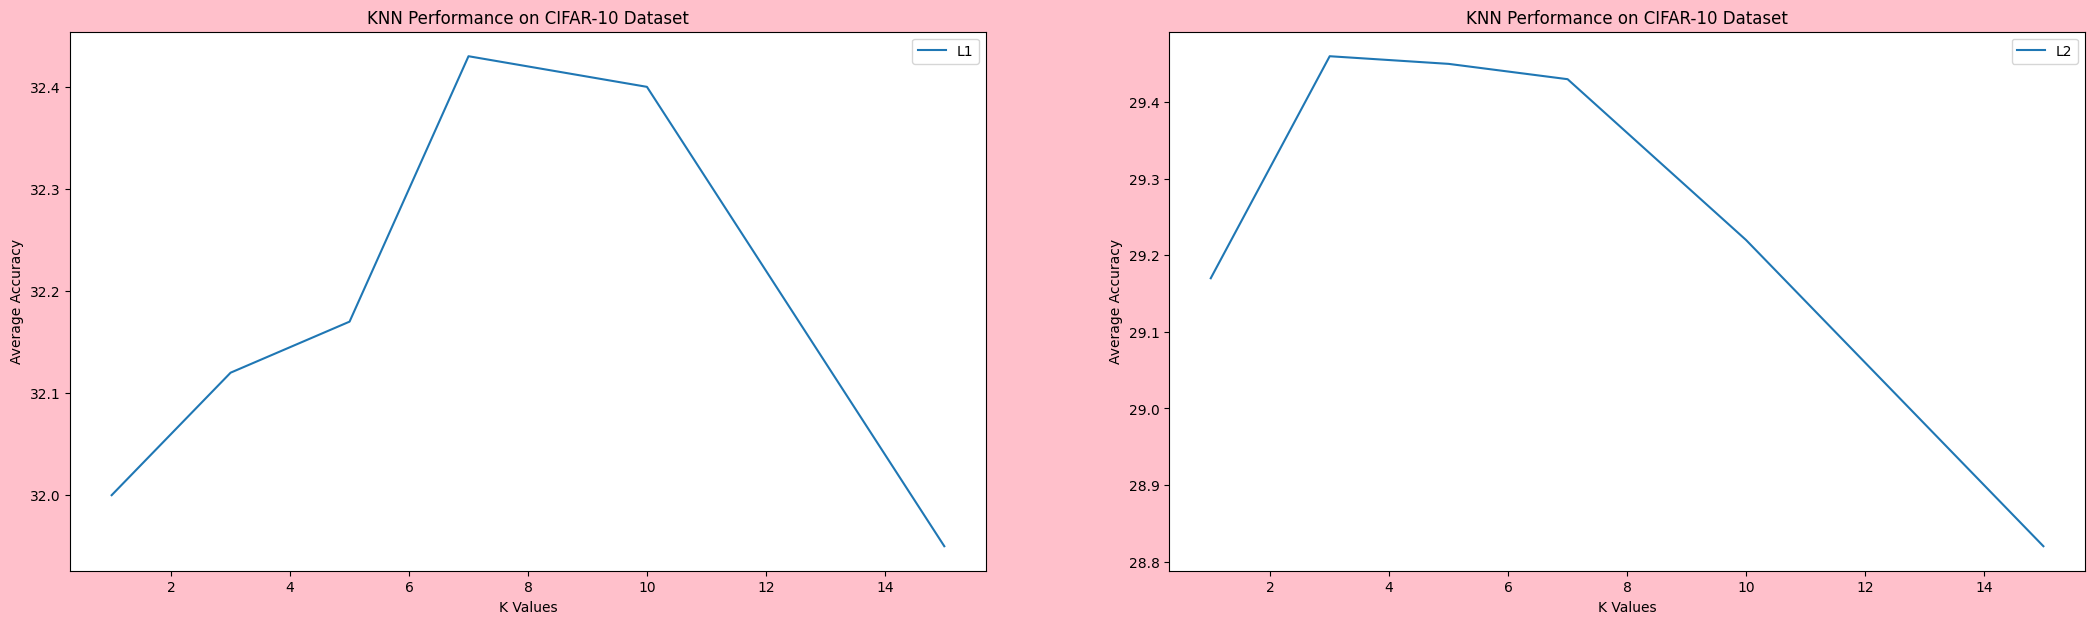

In [24]:
accuracy_dict_list =list(accuracy_dict.values())
accuracy_dict_eu_list =list(accuracy_dict_eu.values())

plt.figure(figsize=(26,7), facecolor='pink')
plt.subplot(1,2,1)
plt.plot(k_values, accuracy_dict_list, label='L1')
plt.xlabel("K Values")
plt.ylabel("Average Accuracy")
plt.title("KNN Performance on CIFAR-10 Dataset")
plt.legend()


plt.subplot(1,2,2)
plt.plot(k_values, accuracy_dict_eu_list, label='L2')
plt.xlabel("K Values")
plt.ylabel("Average Accuracy")
plt.title("KNN Performance on CIFAR-10 Dataset")
plt.legend()
plt.show()

Discussion:
Based on the accuracy values that we got from here, Manhattan distance tends to work better when dealing with high-dimensional data with many irrelevant features, while Euclidean distance tends to work better when dealing with low-dimensional data with few relevant features. This is because Manhattan distance is less affected by irrelevant features since it only considers the differences along each dimension, whereas Euclidean distance considers the overall distance between points. So in this case Manhattan distance works better as each accuracy is higher than Euclidean distance